In [146]:
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np
import cv2

In [60]:
def show(img, cmap=None, title=None):
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    
    if title:
        plt.title(title)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# Histogram Equalization

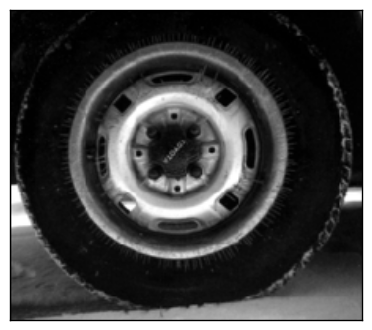

In [61]:
img = misc.imread('image.png')
show(img, cmap='gray')

## Original histogram of the image

In [62]:
L = 256

In [63]:
count_map = np.zeros(L)
values = range(0, L)

In [64]:
for row in img:
    for val in row:
        count_map[val] += 1

In [65]:
count_map = count_map / (img.shape[0] * img.shape[1])

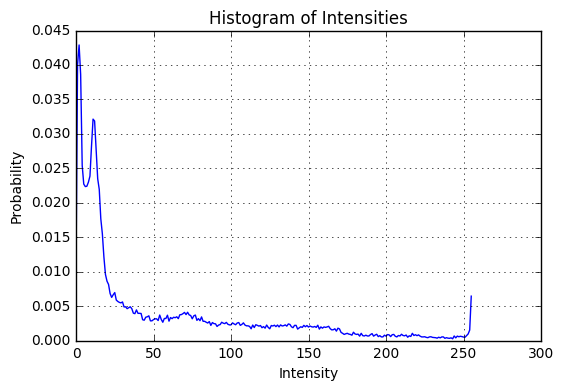

In [66]:
plt.plot(values, count_map)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## Transform values

$ s_k = T(r_k) = (L-1) \sum_{j=0}^{r} p_r(r_j) $

In [67]:
transformed_values = []
p_sum = 0

for value in values:
    p_sum += count_map[value]
    tr_value = int(round((L-1) * p_sum))
    transformed_values.append(tr_value)

In [68]:
tr_count_map = np.zeros(L)

In [69]:
for value in values:
    tr_count_map[transformed_values[value]] += count_map[value]

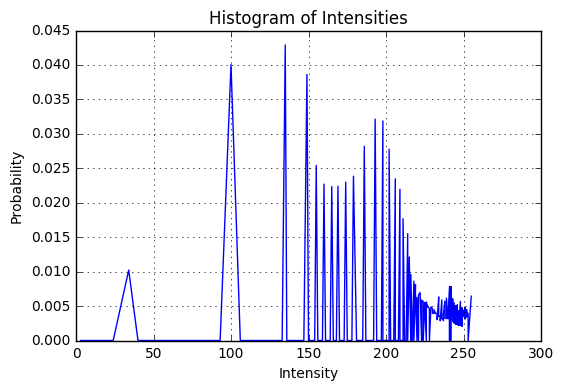

In [70]:
plt.plot(transformed_values, tr_count_map)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [71]:
for i, row in enumerate(img):
    for j, col in enumerate(row):
        img[i, j] = transformed_values[img[i, j]]

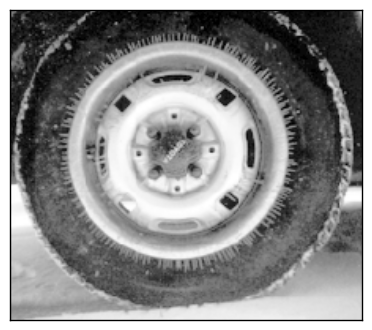

In [72]:
show(img, cmap='gray')

# Median filtering

Replace each value by the median of the values surrounding it.

In [117]:
img = misc.imread('circuit.jpg')

In [154]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
            row,col,ch = image.shape
            mean = 0
            sigma = 0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy = image + gauss
            return noisy
    elif noise_typ == "sp":
        s_vs_p = 0.5
        amount = 0.1
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy


In [119]:
noisy_image = noisy('sp', img)

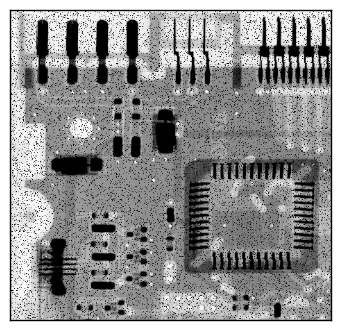

In [121]:
show(noisy_image, cmap='gray')

In [122]:
def median_filtering(image, filter_size=5):
    recovered_image = np.copy(image)
    leave_out = (filter_size - 1) / 2
    for i_x in range(leave_out, image.shape[0]-leave_out):
        for i_y in range(leave_out, image.shape[1]-leave_out):
            patch = noisy_image[i_x-leave_out:i_x+leave_out+1, i_y-leave_out:i_y+leave_out+1]
            patch = np.sort(patch, axis=None)
            recovered_image[i_x, i_y] = patch[(filter_size * filter_size + 1)/2 - 1]
        
#     show(recovered_image, cmap='gray', title='Filter size = %s' % filter_size)
    return recovered_image

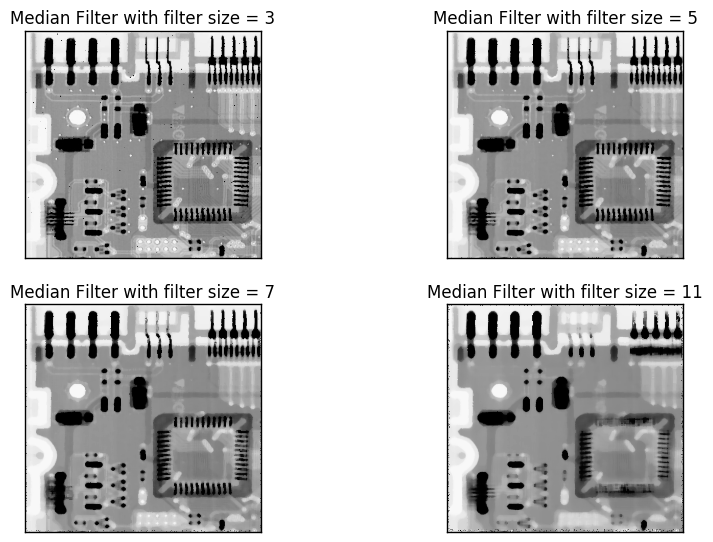

In [123]:
filter_sizes = [3, 5, 7, 11]
plt.figure(figsize=(10,10))
columns = 2
for i,filter_size in enumerate(filter_sizes):
    img_ = median_filtering(noisy_image, filter_size=filter_size).astype(np.uint8)
    plt.subplot(len(filter_sizes)/columns + 1, columns, i+1)
    plt.title('Median Filter with filter size = %d' % filter_size)
    plt.imshow(img_, cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

## Non-local means filtering (Using OpenCV)

In [128]:
img = misc.imread('dice.png')

In [155]:
noisy_image = noisy('gauss', img).astype(np.uint8)

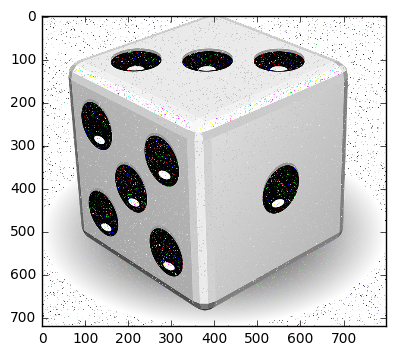

In [156]:
plt.imshow(noisy_image)

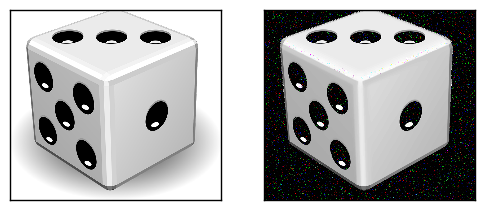

In [158]:
recovered_image = cv2.fastNlMeansDenoisingColored(noisy_image,None,10,10,7,21).astype(np.uint8)

plt.subplot(121),plt.imshow(img)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

plt.subplot(122),plt.imshow(recovered_image)

frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.show()